# Analysing a database of medical records in Mexico and using Data Science and Machine Learning and to predict high-risk Covid-19 patients.
### *in Google Colab*

### Guidelines: 
*You have to understand the business problem, propose
success criteria and see how it can be translated into a machine learning problem. Then you look at the
characteristics of the data and you perform the required explorations, visualizations and transformations.
Next step is to identify insights, develop predictive models and to evaluate them in order to validate if they
are helpful in the business problems. During the whole process take notes, always identify the questions you
want to answer and think before you act: “why is this plot or this transformation useful”. You can perform
some operations just for the sake of training but you should be aware of that.*


*The result is a report in the form of a notebook with clear explanatory text and code that works showing
results. The report should be clear, as concise as possible and it should be easy to read and to follow. You
will be telling the story of your approach to this problem, so it should have a good narrative flow. Always
explain what you are doing, why you are doing it, what are the results and what do you take from those
results.*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

d = pd.read_csv('/content/drive/MyDrive/IDS/covid19Mexico_Apr2020_Jan2021.csv')

# Data Understanding

- *Looking at the raw data, describe variables according to their types: interval-scaled, binary,
nominal, ordinal, ratio-scaled. Be aware that there are specific methods suitable to each type of
variable.*
- *Perform a preliminary analysis (summaries, spread measures, histograms, boxplots, density). These
are interesting to be applied to the raw data to “uncover’ ’ inconsistencies, outliers, duplicates etc.*
- *Perform bivariate analysis (correlations, regression)*
- *Provide any insights about the data and the problem that you may have found.*

In [2]:
print("Data has",d.shape[0],"rows and",d.shape[1],"attributes")

Data has 3779640 rows and 40 attributes


In [ ]:
d.info()

In [ ]:
d.head(5)

FECHA_ACTUALIZACION ID_REGISTRO  ORIGEN  SECTOR  ENTIDAD_UM  SEXO  \
1          2021-10-31      z4d6fe       1       6          24     1   
2          2021-10-31      z1e370       1      12          14     1   
3          2021-10-31      z3bf80       2      12           8     2   
4          2021-10-31      zz7067       1      12           9     2   
5          2021-10-31      z393a3       1      12           9     1   

   ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE  ... OTRO_CASO  \
1           24           24             28              1  ...         2   
2           14           14             85              1  ...         2   
3            8            8             37              1  ...         2   
4            9            9              7              1  ...         2   
5            9            9             17              1  ...         1   

  TOMA_MUESTRA_LAB RESULTADO_LAB  TOMA_MUESTRA_ANTIGENO  RESULTADO_ANTIGENO  \
1                1             1                      2                  97   
2                1             2                      2                  97   
3                1             1                      2                  97   
4                1             2                      2                  97   
5                2            97                      1                   2   

   CLASIFICACION_FINAL  MIGRANTE  PAIS_NACIONALIDAD  PAIS_ORIGEN  UCI  
1                    3        99             México           97   97  
2                    7        99             México           97   97  
3                    3        99             México           97   97  
4                    7        99             México           97   97  
5                    7        99             México           97   97  

[5 rows x 40 columns]

In [ ]:
d.describe(include="object")

FECHA_ACTUALIZACION ID_REGISTRO FECHA_INGRESO FECHA_SINTOMAS  \
count              3779640     3779640       3779640        3779640   
unique                   1     3779640           295            304   
top             2021-10-31      z4d6fe    2020-12-29     2020-12-28   
freq               3779640           1         42246          36651   

         FECHA_DEF PAIS_NACIONALIDAD PAIS_ORIGEN  
count      3779640           3779640     3779640  
unique         417               141          98  
top     9999-99-99            México          97  
freq       3572203           3762115     3775711

In [ ]:
d.iloc[:, 0:20].describe() #to fit better into page

ORIGEN        SECTOR    ENTIDAD_UM          SEXO   ENTIDAD_NAC  \
count  3.779640e+06  3.779640e+06  3.779640e+06  3.779640e+06  3.779640e+06   
mean   1.685989e+00  9.511909e+00  1.428661e+01  1.482816e+00  1.534563e+01   
std    4.641209e-01  3.569800e+00  7.888192e+00  4.997047e-01  9.693700e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  9.000000e+00  1.000000e+00  9.000000e+00   
50%    2.000000e+00  1.200000e+01  1.100000e+01  1.000000e+00  1.300000e+01   
75%    2.000000e+00  1.200000e+01  2.000000e+01  2.000000e+00  2.100000e+01   
max    2.000000e+00  9.900000e+01  3.200000e+01  2.000000e+00  9.900000e+01   

        ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE      INTUBADO      NEUMONIA  \
count  3.779640e+06   3.779640e+06   3.779640e+06  3.779640e+06  3.779640e+06   
mean   1.460025e+01   3.280078e+01   1.134076e+00  8.440130e+01  1.903805e+00   
std    7.820309e+00   4.431819e+01   3.407337e-01  3.225062e+01  3.272028e-01   
min    1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
25%    9.000000e+00   7.000000e+00   1.000000e+00  9.700000e+01  2.000000e+00   
50%    1.300000e+01   1.700000e+01   1.000000e+00  9.700000e+01  2.000000e+00   
75%    2.000000e+01   3.900000e+01   1.000000e+00  9.700000e+01  2.000000e+00   
max    3.200000e+01   9.990000e+02   2.000000e+00  9.900000e+01  9.900000e+01   

               EDAD  NACIONALIDAD      EMBARAZO  HABLA_LENGUA_INDIG  \
count  3.779640e+06  3.779640e+06  3.779640e+06        3.779640e+06   
mean   4.128358e+01  1.004638e+00  4.818635e+01        6.333621e+00   
std    1.688245e+01  6.794674e-02  4.749299e+01        2.005535e+01   
min    0.000000e+00  1.000000e+00  1.000000e+00        1.000000e+00   
25%    2.900000e+01  1.000000e+00  2.000000e+00        2.000000e+00   
50%    4.000000e+01  1.000000e+00  2.000000e+00        2.000000e+00   
75%    5.200000e+01  1.000000e+00  9.700000e+01        2.000000e+00   
max    1.200000e+02  2.000000e+00  9.900000e+01        9.900000e+01   

           INDIGENA  
count  3.779640e+06  
mean   6.240513e+00  
std    1.985498e+01  
min    1.000000e+00  
25%    2.000000e+00  
50%    2.000000e+00  
75%    2.000000e+00  
max    9.900000e+01

In [ ]:
d.iloc[:, 20:40].describe()

DIABETES          EPOC          ASMA      INMUSUPR  HIPERTENSION  \
count  3.779640e+06  3.779640e+06  3.779640e+06  3.779640e+06  3.779640e+06   
mean   2.197837e+00  2.274450e+00  2.254649e+00  2.278861e+00  2.141052e+00   
std    5.427553e+00  5.220992e+00  5.180081e+00  5.252565e+00  5.259461e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
50%    2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
75%    2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
max    9.800000e+01  9.800000e+01  9.800000e+01  9.800000e+01  9.800000e+01   

           OTRA_COM  CARDIOVASCULAR      OBESIDAD  RENAL_CRONICA  \
count  3.779640e+06    3.779640e+06  3.779640e+06   3.779640e+06   
mean   2.414230e+00    2.267941e+00  2.142596e+00   2.265561e+00   
std    6.434746e+00    5.210145e+00  5.132911e+00   5.176815e+00   
min    1.000000e+00    1.000000e+00  1.000000e+00   1.000000e+00   
25%    2.000000e+00    2.000000e+00  2.000000e+00   2.000000e+00   
50%    2.000000e+00    2.000000e+00  2.000000e+00   2.000000e+00   
75%    2.000000e+00    2.000000e+00  2.000000e+00   2.000000e+00   
max    9.800000e+01    9.800000e+01  9.800000e+01   9.800000e+01   

         TABAQUISMO     OTRO_CASO  TOMA_MUESTRA_LAB  RESULTADO_LAB  \
count  3.779640e+06  3.779640e+06      3.779640e+06   3.779640e+06   
mean   2.212116e+00  7.144544e+00      1.194510e+00   2.018786e+01   
std    5.323705e+00  2.275771e+01      3.958229e-01   3.775104e+01   
min    1.000000e+00  1.000000e+00      1.000000e+00   1.000000e+00   
25%    2.000000e+00  1.000000e+00      1.000000e+00   1.000000e+00   
50%    2.000000e+00  2.000000e+00      1.000000e+00   2.000000e+00   
75%    2.000000e+00  2.000000e+00      1.000000e+00   2.000000e+00   
max    9.800000e+01  9.900000e+01      2.000000e+00   9.700000e+01   

       TOMA_MUESTRA_ANTIGENO  RESULTADO_ANTIGENO  CLASIFICACION_FINAL  \
count           3.779640e+06        3.779640e+06         3.779640e+06   
mean            1.857466e+00        8.342433e+01         5.214347e+00   
std             3.495975e-01        3.329775e+01         1.986074e+00   
min             1.000000e+00        1.000000e+00         1.000000e+00   
25%             2.000000e+00        9.700000e+01         3.000000e+00   
50%             2.000000e+00        9.700000e+01         7.000000e+00   
75%             2.000000e+00        9.700000e+01         7.000000e+00   
max             2.000000e+00        9.700000e+01         7.000000e+00   

           MIGRANTE           UCI  
count  3.779640e+06  3.779640e+06  
mean   9.858829e+01  8.440773e+01  
std    6.314146e+00  3.223429e+01  
min    1.000000e+00  1.000000e+00  
25%    9.900000e+01  9.700000e+01  
50%    9.900000e+01  9.700000e+01  
75%    9.900000e+01  9.700000e+01  
max    9.900000e+01  9.900000e+01

### The variables described (IN-PROGRESS, I haven't found what some columns mean exactly yet) 

0. FECHA_ACTUALIZACION (update date): object type, all 3779640 are set to "2021-10-31", not an useful column
1. ID_REGISTRO (ID): object type, an ID code of 6 characters, all unique
2. ORIGEN (source): integer type, 1 or 2
3. SECTOR (sector): integer type, 1 to 13, 10 values set to 99 
4. ENTIDAD_UM (UM entity?): integer type, 1 to 32 
5. SEXO (sex): integer type, 1 or 2
6. ENTIDAD_NAC (NAC entity?): integer type, 1 to 99 
7. ENTIDAD_RES (RES entity?): integer type, 1 to 32 
8. MUNICIPIO_RES (municipality RES): integer type, 1 to 999 ??
9. TIPO_PACIENTE (patient type): integer type, 1 or 2,
10. FECHA_INGRESO (income date): object type, continuous
11. FECHA_SINTOMA (date of symptoms): object type, continuous
12. FECHA_DEF (date DEF?): object type, date, ~3.6M "9999-99-99", continuous
13. INTUBADO (intubated): integer type, 1 or 2, ~3.3M 97, ~6k 99
14. NEUMONIA (pneumonia): interger type, 1 or 2, 8 99
15. EDAD (age): : interger type, continuous, youngest age recorded is 0 and oldest 120, in the paper it is divided into age groups <18, 18-40, 41-65, >65
16. NACIONALIDAD (nationality): interger type, 1 or 2
17. EMBARAZO (pregnancy): interger type, 1 or 2, ~1.8M are 97, 13k 98, 4 99
18. HABLA_LENGUA_INDIG (speaks indigenous language): interger type, 1 or 2, ~169k of values set to 99
19. INDIGENA (indigenous): interger type, 1 or 2, ~166k of values set to 99

Deborah's part:   
-  DIABETES  
-  EPOC: ?
-  ASMA     
-  INMUSUPR
-  HIPERTENSION 
-  OTRA_COM: other comments? 
-  CARDIOVASCULAR: 
-  OBESIDAD: 
-  RENAL_CRONICA: 
-  TABAQUISMO:
-  OTRO_CASO:
-  TOMA_MUESTRA_LAB: take sample lab 
- RESULTADO_LAB: result lab
- TOMA_MUESTRA_ANTIGENO: take sample antigen 
- RESULTADO_ANTIGENO: 
- CLASIFICACION_FINAL:  
- MIGRANTE: 
- PAIS_NACIONALIDAD:
- PAIS_ORIGEN:
- UCI: ICU



### Checking one by one columns

In [25]:
d.FECHA_ACTUALIZACION.value_counts()

2021-10-31    3779640
Name: FECHA_ACTUALIZACION, dtype: int64

In [24]:
d.ID_REGISTRO.is_unique

True

In [26]:
d.ORIGEN.value_counts()

2    2592791
1    1186849
Name: ORIGEN, dtype: int64

In [27]:
d.SECTOR.value_counts()

12    2456475
4      939787
6      124754
9      123445
3       49288
8       25232
10      21237
5       19414
11      12515
13       2709
7        2673
2        1372
1         729
99         10
Name: SECTOR, dtype: int64

In [11]:
d.ENTIDAD_UM.max()

32

In [9]:
d.SEXO.value_counts()

1    1954768
2    1824872
Name: SEXO, dtype: int64

In [8]:
d.ENTIDAD_NAC.max()

99

In [7]:
d.ENTIDAD_RES.max()

32

In [6]:
d.MUNICIPIO_RES.max()

999

In [32]:
d.TIPO_PACIENTE.value_counts()

1    3272882
2     506758
Name: TIPO_PACIENTE, dtype: int64

In [33]:
d.FECHA_INGRESO.value_counts()

2020-12-29    42246
2020-12-28    42012
2020-12-30    40568
2020-12-21    39167
2020-12-22    37794
              ...  
2021-01-16       46
2021-01-17       28
2021-01-23       13
2021-01-31        4
2021-01-30        1
Name: FECHA_INGRESO, Length: 295, dtype: int64

In [34]:
d.FECHA_SINTOMAS.value_counts()

2020-12-28    36651
2020-12-10    34856
2020-12-01    34450
2020-12-14    33474
2020-12-15    32927
              ...  
2020-01-15        1
2020-01-16        1
2020-03-11        1
2020-01-20        1
2020-03-06        1
Name: FECHA_SINTOMAS, Length: 304, dtype: int64

In [35]:
d.FECHA_DEF.value_counts()

9999-99-99    3572203
2021-01-04       1211
2020-12-29       1210
2021-01-03       1197
2020-12-28       1194
               ...   
2021-04-15          1
2021-06-19          1
2021-06-24          1
2021-05-04          1
2021-09-25          1
Name: FECHA_DEF, Length: 417, dtype: int64

In [36]:
d.INTUBADO.value_counts()

97    3272882
2      436045
1       64650
99       6063
Name: INTUBADO, dtype: int64

In [37]:
d.NEUMONIA.value_counts()

2     3415275
1      364357
99          8
Name: NEUMONIA, dtype: int64

In [28]:
d.EDAD.value_counts()

30     95368
28     93373
29     91975
27     91327
31     90853
       ...  
114        7
113        7
119        6
116        6
111        5
Name: EDAD, Length: 121, dtype: int64

In [38]:
d.NACIONALIDAD.value_counts()

1    3762109
2      17531
Name: NACIONALIDAD, dtype: int64

In [39]:
d.EMBARAZO.value_counts()

2     1913069
97    1824872
1       28847
98      12848
99          4
Name: EMBARAZO, dtype: int64

In [40]:
d.HABLA_LENGUA_INDIG.value_counts()

2     3585996
99     169114
1       24530
Name: HABLA_LENGUA_INDIG, dtype: int64

In [41]:
d.INDIGENA.value_counts()

2     3580413
99     165580
1       33647
Name: INDIGENA, dtype: int64

### Quick histograms (useless tbh)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f950657ed90>,
      dtype=object)

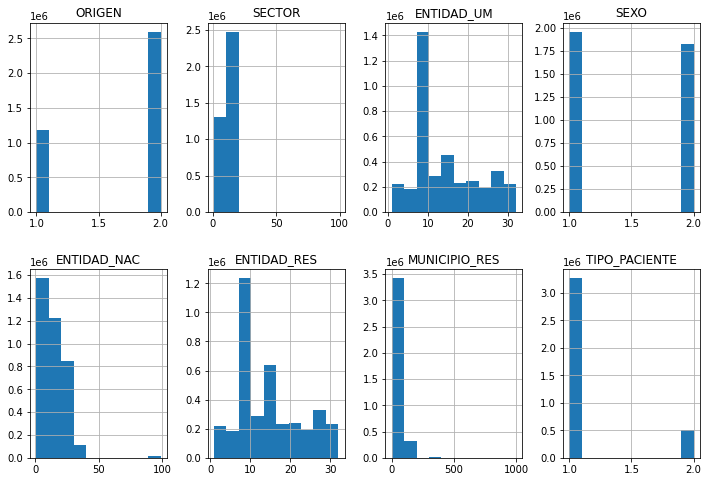

In [16]:
fig, ax = plt.subplots(figsize=(12,8)) #ignores object types, quick overlook, not to be used in final report
d.iloc[:, 2:10].hist(ax=ax, layout=(2,4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95051ae810>,
      dtype=object)

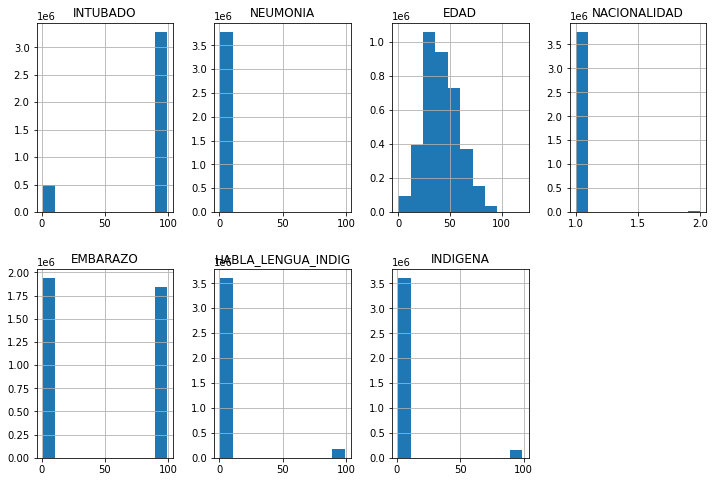

In [21]:
fig, ax = plt.subplots(figsize=(12,8)) #ignores object types, quick overlook, not to be used in final report
d.iloc[:, 13:20].hist(ax=ax, layout=(2,4))

### Value counts for columns with more than 2 categories

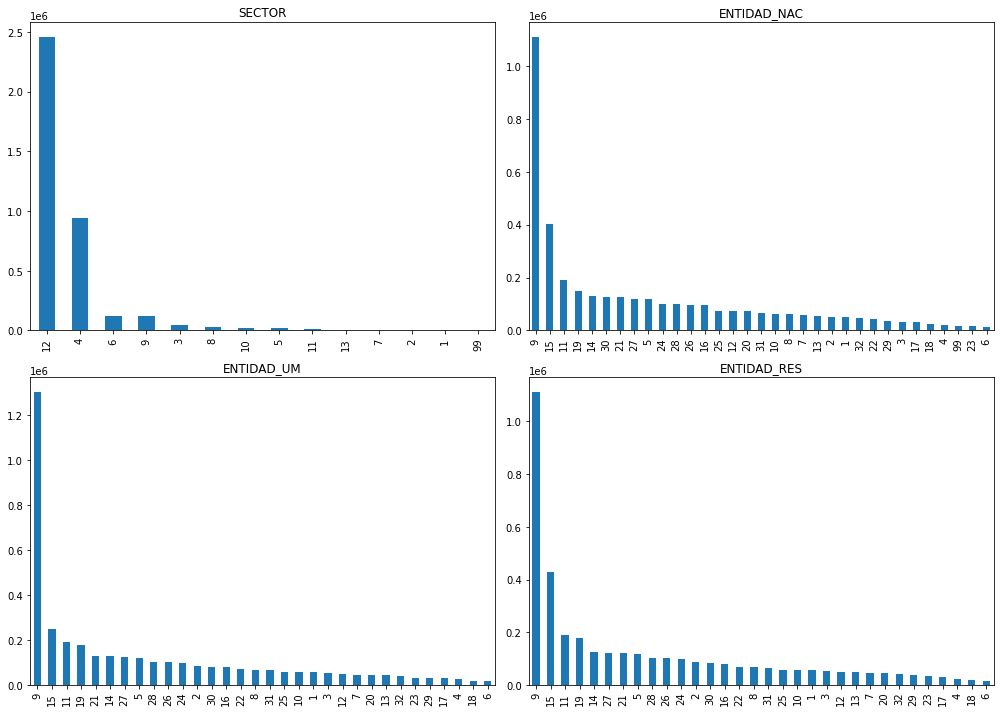

In [16]:
#d.iloc[:, 3].value_counts().plot(kind='bar')
#d.iloc[:, 4].value_counts().plot(kind='bar')


fig, axs = plt.subplots(2, 2, figsize=(14,10))
d.iloc[:, 3].value_counts().plot(ax=axs[0,0], kind='bar')
axs[0, 0].set_title("SECTOR")
d.iloc[:, 4].value_counts().plot(ax=axs[1,0], kind='bar')
axs[1, 0].set_title("ENTIDAD_UM")
d.iloc[:, 6].value_counts().plot(ax=axs[0,1],kind='bar')
axs[0, 1].set_title("ENTIDAD_NAC")
d.iloc[:, 7].value_counts().plot(ax=axs[1,1],kind='bar')
axs[1, 1].set_title("ENTIDAD_RES")
fig.tight_layout()

<AxesSubplot:xlabel='MUNICIPIO_RES'>

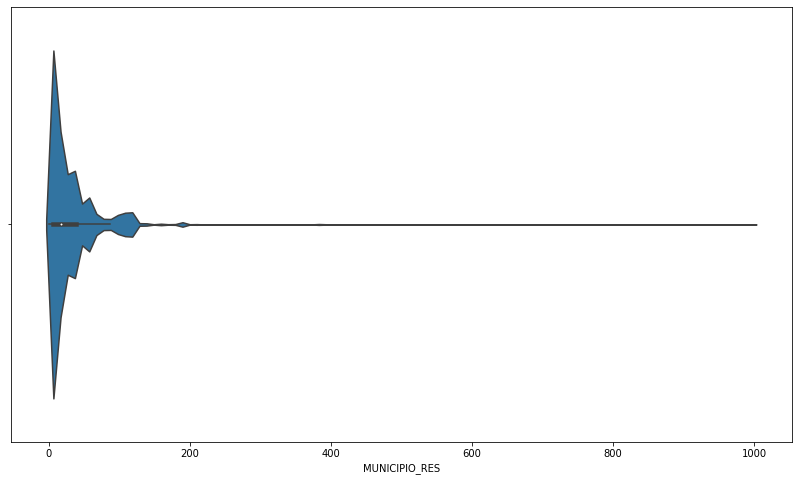

In [28]:
plt.figure(figsize=(14,8))
sns.violinplot(x=d.iloc[:, 8])

<AxesSubplot:xlabel='EDAD'>

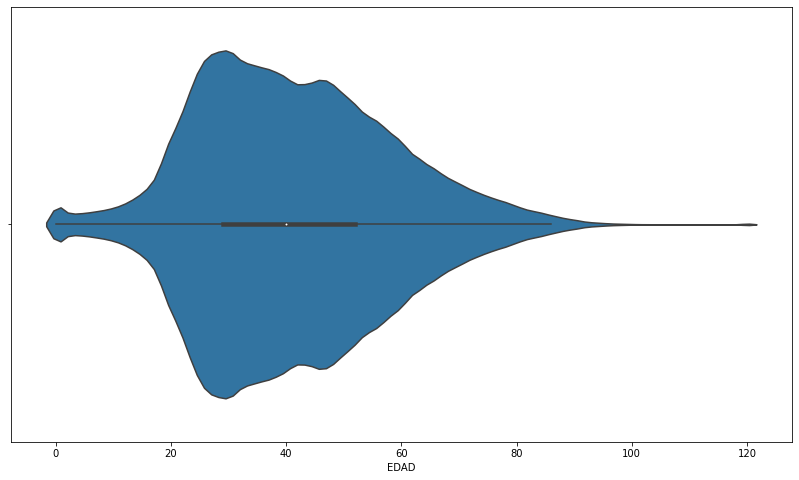

In [29]:
plt.figure(figsize=(14,8))
sns.violinplot(x=d.iloc[:, 15])

## Things noticed:
- there are no missing values
- **NA values are described:**
  - Don’t know - 97
  - Answer refused - 98
  - Not applicable - 99
- 1 means yes, 2 means no in most columns
- IN-PROGRESS

# Data Preparation
- *List of main changes that can need to be performed to the raw data, including feature selection.*
- *Describe the potentially useful ones and their results in terms of data.* 


# Later Steps
*Create the train and test datasets:*
1. *shuffle the dataset entries.*
2. *create a first division of the data into train (Tr) and test (Ts) using a proportion of 80/20 or 70/30.*
3. *Use the training data for calibration of your models (e.g. using Cross validation). You can use sampling,
cross validation and other approaches. Use smaller samples to test ideas and reduce computation time.
Use larger samples to obtain more reliable estimates of model performance.*
4. *Reserve the Ts dataset to evaluate the final models after all modeling decisions are made.*

# Experimenting (some quick EDA):

In [ ]:
pip install -U pandas-profiling

In [3]:
dm = d.iloc[:,0:20]

In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dm, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]